In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:11<00:00, 17.4MB/s]
100% 163M/163M [00:11<00:00, 15.3MB/s]


In [8]:
# extract the dataset

from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dataset

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3272.jpg', 'with_mask_2666.jpg', 'with_mask_1574.jpg', 'with_mask_24.jpg', 'with_mask_3499.jpg']
['with_mask_2444.jpg', 'with_mask_1418.jpg', 'with_mask_612.jpg', 'with_mask_617.jpg', 'with_mask_3706.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1213.jpg', 'without_mask_3542.jpg', 'without_mask_1459.jpg', 'without_mask_3013.jpg', 'without_mask_708.jpg']
['without_mask_1373.jpg', 'without_mask_2036.jpg', 'without_mask_3513.jpg', 'without_mask_2009.jpg', 'without_mask_1344.jpg']


In [13]:
print('Number of with mask images : ', len(with_mask_files))
print('Number of without mask images : ', len(without_mask_files))

Number of with mask images :  3725
Number of without mask images :  3828


Creating labels for the two classes of images

with mask ---> 1


without mask ---> 0

In [14]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

In [15]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

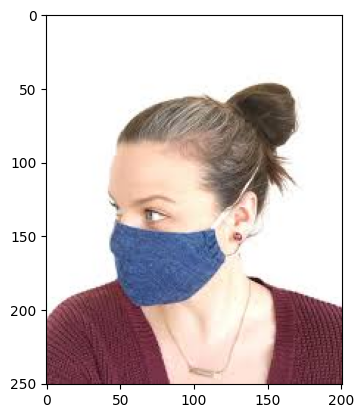

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2666.jpg')
imgplot = plt.imshow(img)

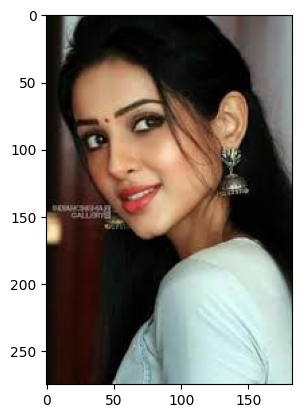

In [18]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2009.jpg')
imgplot = plt.imshow(img)

Image Processing

1. Resize the images
2. Convert the images to numpy arrays

In [19]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + '/' + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + '/' + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
len(data)

7553

In [21]:
type(data[0])
print(data[0].shape)

(128, 128, 3)


Converting image list and label list to numpy arrays

In [22]:
X = np.array(data)
Y = np.array(labels)

In [23]:
print(type(X))
print(X.shape)

print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(7553, 128, 128, 3)
<class 'numpy.ndarray'>
(7553,)


Split the dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1234)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [26]:
# scale the data

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:
X_train_scaled[0]

array([[[0.92156863, 0.93333333, 0.95294118],
        [0.91372549, 0.9254902 , 0.94509804],
        [0.90588235, 0.91764706, 0.9372549 ],
        ...,
        [0.84313725, 0.84313725, 0.85098039],
        [0.84313725, 0.84313725, 0.85098039],
        [0.84313725, 0.84313725, 0.85098039]],

       [[0.92156863, 0.93333333, 0.95294118],
        [0.91764706, 0.92941176, 0.94901961],
        [0.90980392, 0.92156863, 0.94117647],
        ...,
        [0.84313725, 0.84313725, 0.85098039],
        [0.84313725, 0.84313725, 0.85098039],
        [0.84313725, 0.84313725, 0.85098039]],

       [[0.9254902 , 0.9372549 , 0.95686275],
        [0.92156863, 0.93333333, 0.95294118],
        [0.91372549, 0.9254902 , 0.94509804],
        ...,
        [0.84313725, 0.84313725, 0.85098039],
        [0.84313725, 0.84313725, 0.85098039],
        [0.84313725, 0.84313725, 0.85098039]],

       ...,

       [[0.83529412, 0.83137255, 0.82745098],
        [0.85098039, 0.84705882, 0.83529412],
        [0.87843137, 0

Building the CNN Model

In [28]:
import tensorflow as tf
from tensorflow import keras

num_classes = 2

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout

In [30]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='sigmoid'))

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [32]:
history = model.fit(x=X_train_scaled, y=y_train, validation_data=(X_test_scaled, y_test), epochs = 10)

Epoch 1/10
189/189 [==============================] - 18s 31ms/step - loss: 0.4420 - accuracy: 0.7860 - val_loss: 0.2993 - val_accuracy: 0.8789
Epoch 2/10
189/189 [==============================] - 4s 22ms/step - loss: 0.2546 - accuracy: 0.9040 - val_loss: 0.2016 - val_accuracy: 0.9179
Epoch 3/10
189/189 [==============================] - 4s 22ms/step - loss: 0.1995 - accuracy: 0.9335 - val_loss: 0.1707 - val_accuracy: 0.9398
Epoch 4/10
189/189 [==============================] - 4s 22ms/step - loss: 0.1743 - accuracy: 0.9381 - val_loss: 0.1602 - val_accuracy: 0.9444
Epoch 5/10
189/189 [==============================] - 4s 20ms/step - loss: 0.1483 - accuracy: 0.9490 - val_loss: 0.1594 - val_accuracy: 0.9510
Epoch 6/10
189/189 [==============================] - 4s 21ms/step - loss: 0.1086 - accuracy: 0.9628 - val_loss: 0.1349 - val_accuracy: 0.9557
Epoch 7/10
189/189 [==============================] - 4s 21ms/step - loss: 0.0892 - accuracy: 0.9689 - val_loss: 0.1408 - val_accuracy: 0.956

Model Evaluation

In [33]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.1478 - accuracy: 0.9557
Test Accuracy =  0.955658495426178


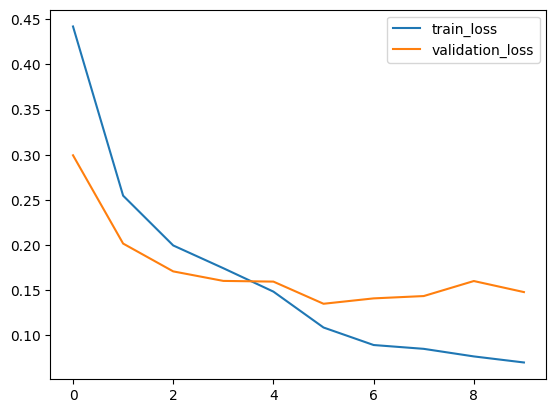

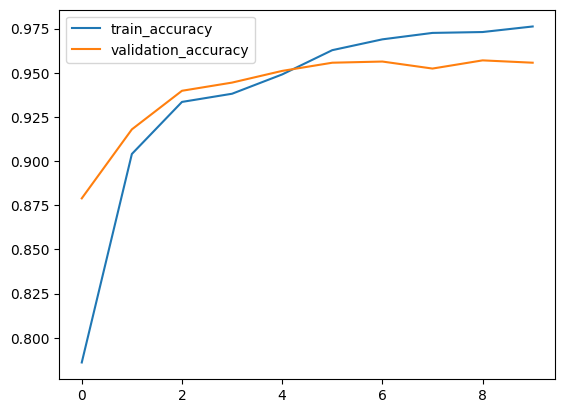

In [34]:
# plotting loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

# plotting accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted/content/test1.jpeg


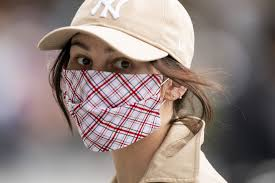

1/1 [==============================] - 0s 19ms/step
[[0.12365553 0.91626245]]
1
The person is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('The person is wearing a mask')

else:

  print('The person is not wearing a mask')